In [8]:
# import libraries
from statsbombpy import sb
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
df_allData = pd.read_csv('fulldata.csv')
df_allData

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_66221/2735379616.py:1: DtypeWarning: Columns (2,4,12,19,26,35,43,49,69,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_allData = pd.read_csv('fulldata.csv')


,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196493,4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196494,4986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196495,4987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196496,4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_throwIn = df_allData.loc[df_allData['pass_type'] == 'Throw-in']
df_throwIn

,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192895,1387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192898,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192903,1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192923,1415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df_throwIn_sort = df_throwIn.sort_values(by = "index")
# df_throwIn_sort

In [20]:
# marking the complete first contact passes
df_throwIn.pass_outcome = df_throwIn.pass_outcome.fillna('Complete')
for row in df_throwIn.index:
    if (df_throwIn["pass_outcome"][row]== "Injury Clearance") or (df_throwIn["pass_outcome"][row]== "Unknown"):
        df_throwIn["pass_outcome"][row]="Incomplete"
df_throwIn["pass_outcome"]

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_66221/2721408823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_throwIn.pass_outcome = df_throwIn.pass_outcome.fillna('Complete')
/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_66221/2721408823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_throwIn["pass_outcome"][row]="Incomplete"


8           Complete
15          Complete
16          Complete
22          Complete
25          Complete
             ...    
192895      Complete
192898    Incomplete
192903      Complete
192923      Complete
192927    Incomplete
Name: pass_outcome, Length: 1993, dtype: object

In [21]:
df_throwIn.drop(df_throwIn.columns.difference(['pass_outcome','location', "pass_height", "pass_angle", "pass_length"]), 1, inplace=True)
df_throwIn_sort = df_throwIn.reset_index()
df_throwIn_sort

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_66221/182920667.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_throwIn.drop(df_throwIn.columns.difference(['pass_outcome','location', "pass_height", "pass_angle", "pass_length"]), 1, inplace=True)
/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_66221/182920667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_throwIn.drop(df_throwIn.columns.difference(['pass_outcome','location', "pass_height", "pass_angle", "pass_length"]), 1, inplace=True)


,index,location,pass_angle,pass_height,pass_length,pass_outcome
0,8,"[43.1, 0.1]",2.876891,Low Pass,28.285154,Complete
1,15,"[91.1, 0.1]",0.897825,Low Pass,8.823832,Complete
2,16,"[83.0, 0.1]",1.229344,Low Pass,12.841339,Complete
3,22,"[64.3, 80.0]",-2.664129,Low Pass,25.896140,Complete
4,25,"[30.0, 0.1]",2.238189,Low Pass,27.627884,Complete
...,...,...,...,...,...,...
1988,192895,"[106.8, 80.0]",-1.432344,High Pass,12.317873,Complete
1989,192898,"[106.4, 80.0]",-1.482073,High Pass,32.728733,Incomplete
1990,192903,"[36.2, 0.1]",2.527574,Low Pass,14.926487,Complete
1991,192923,"[54.8, 0.1]",1.030918,High Pass,31.710093,Complete


In [22]:
for row in df_throwIn_sort.index:
    df_throwIn_sort["location"][row] = json.loads(df_throwIn_sort["location"][row])

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_66221/4050281909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_throwIn_sort["location"][row] = json.loads(df_throwIn_sort["location"][row])


In [23]:
df_split_loc = pd.DataFrame(df_throwIn_sort['location'].tolist(), columns=['x_loc', 'y_loc'])
df_split_loc

,x_loc,y_loc
0,43.1,0.1
1,91.1,0.1
2,83.0,0.1
3,64.3,80.0
4,30.0,0.1
...,...,...
1988,106.8,80.0
1989,106.4,80.0
1990,36.2,0.1
1991,54.8,0.1


In [24]:
df_throwIn_sorted = df_throwIn_sort.drop(columns="location")
df_throwIn_final = df_throwIn_sorted.assign(x_loc = df_split_loc["x_loc"], y_loc = df_split_loc["y_loc"])
df_throwIn_final

,index,pass_angle,pass_height,pass_length,pass_outcome,x_loc,y_loc
0,8,2.876891,Low Pass,28.285154,Complete,43.1,0.1
1,15,0.897825,Low Pass,8.823832,Complete,91.1,0.1
2,16,1.229344,Low Pass,12.841339,Complete,83.0,0.1
3,22,-2.664129,Low Pass,25.896140,Complete,64.3,80.0
4,25,2.238189,Low Pass,27.627884,Complete,30.0,0.1
...,...,...,...,...,...,...,...
1988,192895,-1.432344,High Pass,12.317873,Complete,106.8,80.0
1989,192898,-1.482073,High Pass,32.728733,Incomplete,106.4,80.0
1990,192903,2.527574,Low Pass,14.926487,Complete,36.2,0.1
1991,192923,1.030918,High Pass,31.710093,Complete,54.8,0.1


In [25]:
#convert "height" to dummy variable
df_throwIn_dummy = pd.get_dummies(df_throwIn_final, columns=['pass_height'], drop_first=True)
# high pass = 0, low pass = 1
df_throwIn_dummy.rename(columns={'pass_height_Low Pass':'pass_height'},inplace=True)
df_throwIn_dummy

,index,pass_angle,pass_length,pass_outcome,x_loc,y_loc,pass_height
0,8,2.876891,28.285154,Complete,43.1,0.1,1
1,15,0.897825,8.823832,Complete,91.1,0.1,1
2,16,1.229344,12.841339,Complete,83.0,0.1,1
3,22,-2.664129,25.896140,Complete,64.3,80.0,1
4,25,2.238189,27.627884,Complete,30.0,0.1,1
...,...,...,...,...,...,...,...
1988,192895,-1.432344,12.317873,Complete,106.8,80.0,0
1989,192898,-1.482073,32.728733,Incomplete,106.4,80.0,0
1990,192903,2.527574,14.926487,Complete,36.2,0.1,1
1991,192923,1.030918,31.710093,Complete,54.8,0.1,0


In [29]:
#convert "outcome" to dummy variable
df_throwIn_dummy1 = pd.get_dummies(df_throwIn_dummy, columns=['pass_outcome'], drop_first=True)
# complete = 0, incomplete = 1
df_throwIn_dummy1.rename(columns={'pass_outcome_Incomplete':'pass_outcome'},inplace=True)
df_throwIn_dummy1.drop(columns="pass_outcome_Out",inplace=True)
df_throwIn_dummy1

,index,pass_angle,pass_length,x_loc,y_loc,pass_height,pass_outcome
0,8,2.876891,28.285154,43.1,0.1,1,0
1,15,0.897825,8.823832,91.1,0.1,1,0
2,16,1.229344,12.841339,83.0,0.1,1,0
3,22,-2.664129,25.896140,64.3,80.0,1,0
4,25,2.238189,27.627884,30.0,0.1,1,0
...,...,...,...,...,...,...,...
1988,192895,-1.432344,12.317873,106.8,80.0,0,0
1989,192898,-1.482073,32.728733,106.4,80.0,0,1
1990,192903,2.527574,14.926487,36.2,0.1,1,0
1991,192923,1.030918,31.710093,54.8,0.1,0,0


In [30]:
df_throwIn_dummy1

,index,pass_angle,pass_length,x_loc,y_loc,pass_height,pass_outcome
0,8,2.876891,28.285154,43.1,0.1,1,0
1,15,0.897825,8.823832,91.1,0.1,1,0
2,16,1.229344,12.841339,83.0,0.1,1,0
3,22,-2.664129,25.896140,64.3,80.0,1,0
4,25,2.238189,27.627884,30.0,0.1,1,0
...,...,...,...,...,...,...,...
1988,192895,-1.432344,12.317873,106.8,80.0,0,0
1989,192898,-1.482073,32.728733,106.4,80.0,0,1
1990,192903,2.527574,14.926487,36.2,0.1,1,0
1991,192923,1.030918,31.710093,54.8,0.1,0,0


In [56]:
# x = df_throwIn_dummy1[['pass_angle','pass_length','x_loc','y_loc','pass_height']]
x = df_throwIn_dummy1[['pass_height']]
x = sm.add_constant(x)
np.asarray(x)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 0.],
       [1., 0.]])

In [57]:
y = df_throwIn_dummy1['pass_outcome']
y
np.asarray(y)

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [58]:
model = sm.OLS(y, x)

In [59]:
results = model.fit()

In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           pass_outcome   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     440.8
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.42e-88
Time:                        00:10:34   Log-Likelihood:                -559.67
No. Observations:                1993   AIC:                             1123.
Df Residuals:                    1991   BIC:                             1135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3985      0.014     28.535      

In [54]:
print(f"coefficient of determination: {results.rsquared}")

print(f"adjusted coefficient of determination: {results.rsquared_adj}")

print(f"regression coefficients: {results.params}")

coefficient of determination: 0.08669809214719126
adjusted coefficient of determination: 0.08623937697498996
regression coefficients: const         -0.066314
pass_length    0.011317
dtype: float64


In [55]:
print(f"predicted response:\n{results.fittedvalues}")

predicted response:
0       0.253785
1       0.033544
2       0.079010
3       0.226749
4       0.246347
          ...   
1988    0.073086
1989    0.304072
1990    0.102607
1991    0.292544
1992    0.247563
Length: 1993, dtype: float64


In [40]:
X = df_throwIn_dummy1[['pass_angle','pass_length','x_loc','y_loc','pass_height']]
# X = df_throwIn_dummy1['pass_length'].values
Y = df_throwIn_dummy1['pass_outcome'].values

In [41]:
print(X.shape, Y.shape)

(1993, 5) (1993,)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = ml.predict(x_test)
print(y_pred)

[0.14710275 0.14922694 0.14216754 0.15464779 0.13963973 0.15443957
 0.15391784 0.15030376 0.15171918 0.14710275 0.1512356  0.14275011
 0.13603728 0.15450874 0.15158456 0.13594901 0.14398749 0.15245107
 0.15275085 0.14764509 0.1375837  0.13525665 0.1506176  0.1359309
 0.13980439 0.14878369 0.14580444 0.13488051 0.14718626 0.1430009
 0.15407137 0.14160936 0.15143882 0.14408458 0.14761153 0.13738285
 0.14427851 0.14297127 0.13707849 0.14294651 0.15230696 0.13962366
 0.14515033 0.13615976 0.15291386 0.14970239 0.13682268 0.15439769
 0.1431647  0.13922387 0.14359559 0.1385913  0.15340929 0.14044622
 0.14233009 0.14270505 0.14571239 0.13734899 0.15401697 0.14557944
 0.14795441 0.13511894 0.14365116 0.14375553 0.13923935 0.14965859
 0.15150153 0.14676577 0.13514722 0.14386049 0.14366391 0.14392827
 0.14950108 0.14125783 0.14125969 0.13874768 0.13636082 0.15230696
 0.14410713 0.14602147 0.14368318 0.15264905 0.15301137 0.14425096
 0.13486291 0.13625319 0.15371344 0.14721812 0.1396774  0.153626

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0013302702025799196

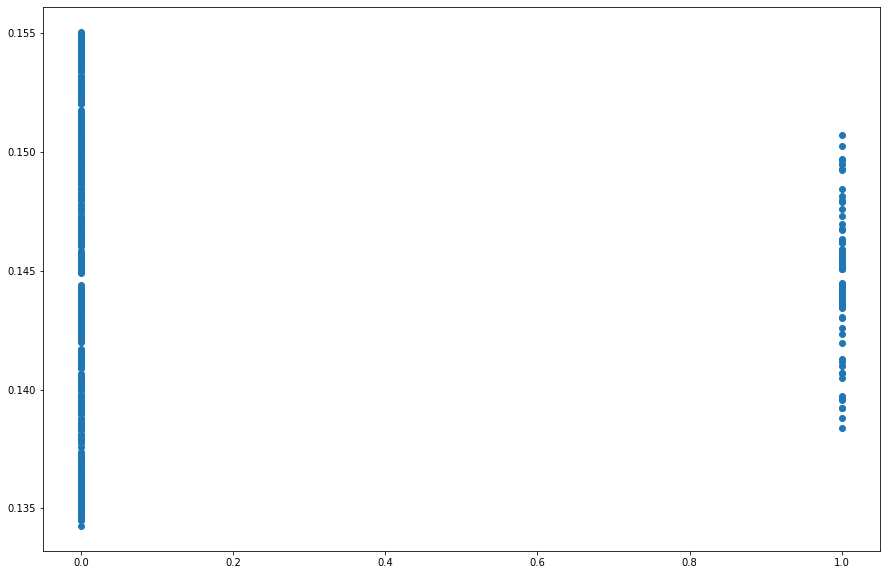

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)

In [47]:
model = LinearRegression().fit(x,y)

In [48]:
r_sq = model.score(x,y)
print(r_sq)

3.670488419371676e-05


In [44]:
intercept = model.intercept_
slope = model.coef_

In [69]:
y_pred = intercept + slope*x